<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/iris(step_bystep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS DATASET TUTORIAL (Step-by-Step)

In [651]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Load Iris dataset from URL
iris=pd.read_csv("https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/iriswithheaders.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [652]:
print(iris.shape)

(150, 5)


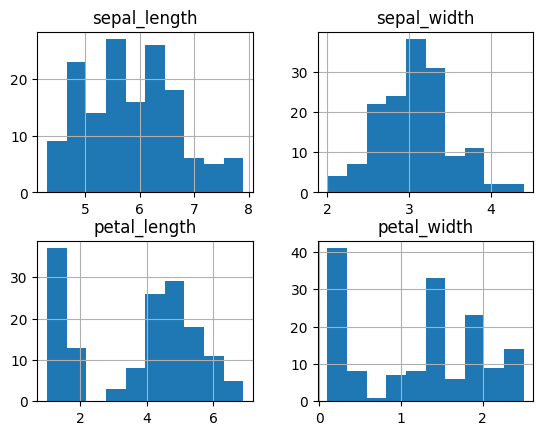

In [653]:
iris.hist()
plt.show()

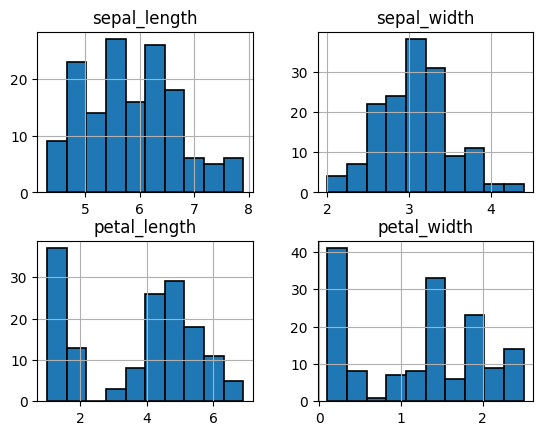

In [654]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()

plt.show()

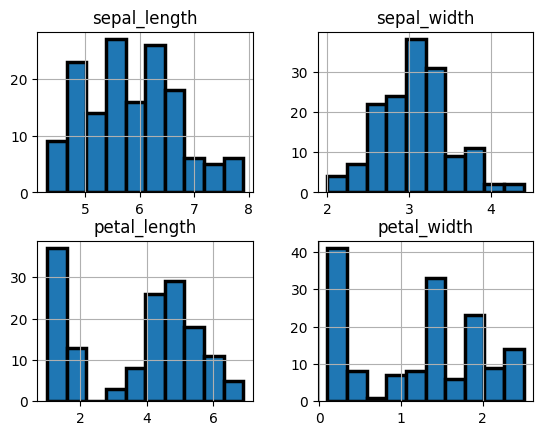

In [655]:
iris.hist(edgecolor='black', linewidth=2.5)
fig=plt.gcf()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

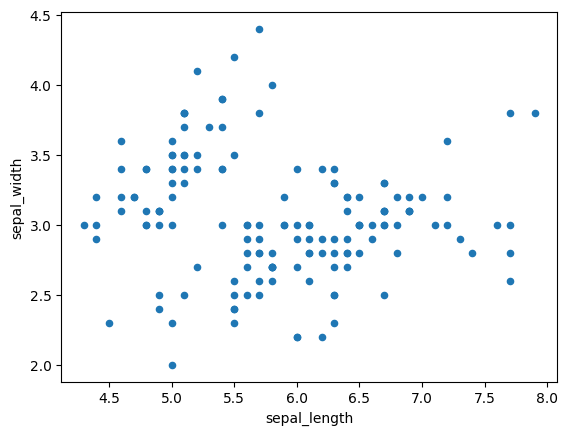

In [656]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

In [657]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [658]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [659]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
test_y = test.species

In [660]:
train_y.head()

,species
143,virginica
21,setosa
79,versicolor
132,virginica
112,virginica


In [661]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
143,6.8,3.2,5.9,2.3
21,5.1,3.7,1.5,0.4
79,5.7,2.6,3.5,1.0
132,6.4,2.8,5.6,2.2
112,6.8,3.0,5.5,2.1


In [662]:
test_y.head()

,species
63,versicolor
109,virginica
134,virginica
106,virginica
133,virginica


In [663]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
63,6.1,2.9,4.7,1.4
109,7.2,3.6,6.1,2.5
134,6.1,2.6,5.6,1.4
106,4.9,2.5,4.5,1.7
133,6.3,2.8,5.1,1.5


In [664]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:', metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [665]:
model = LogisticRegression(max_iter=200)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9210526315789473


In [666]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('accuracy:',metrics.accuracy_score(prediction,test_y))

accuracy: 0.9473684210526315


In [667]:
# Train model using k=3 and print accuracy
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(" Accuracy with k=3:", accuracy_score(test_y, prediction) * 100, "%")

 Accuracy with k=3: 92.10526315789474 %


Want to test how the number of neighbors (k) affects the accuracy of a K-Nearest Neighbors (KNN) classifier using the Iris dataset.

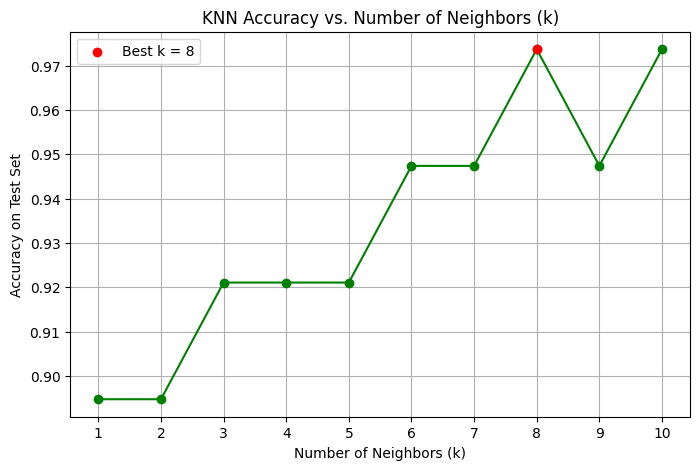

🏆 Best k: 8 → Accuracy: 97.37%


In [668]:
# Tune hyperparameter k (number of neighbors)
k_values = list(range(1, 11))   # Trying k = 1 to 10
accuracies = []                 # Store accuracies for each k

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    acc = accuracy_score(test_y, prediction)
    accuracies.append(acc)

# Plot Accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.xticks(k_values)
plt.title("KNN Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.grid(True)

# Highlight best k
best_k = k_values[accuracies.index(max(accuracies))]
plt.scatter(best_k, max(accuracies), color='red', zorder=5, label=f'Best k = {best_k}')
plt.legend()
plt.show()

# Print the best k and its accuracy
print(f"🏆 Best k: {best_k} → Accuracy: {max(accuracies)*100:.2f}%")

In [669]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [670]:
#1. Preprocessing

# In this case:

# No missing values

# Features are all numeric

# scikit-learn automatically handles string Labels(Target) in classification problems, but not for categorical features.


In [671]:
# 2. Features and Target
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [672]:
# 3. Encode target labels (setosa → 0, versicolor → 1, virginica → 2)
#scikit-learn automatically handles string Labels(Target) in classification problems, but not for categorical features.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [673]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [674]:
# 5. Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [675]:
# 6. Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [676]:
# 7. Predict on a new sample (example similar to setosa)
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]],
                      columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
prediction = model.predict(sample)
predicted_class = label_encoder.inverse_transform(prediction)
print("Predicted class:", predicted_class[0])

Predicted class: setosa
